<a href="https://colab.research.google.com/github/PhoenixAlpha23/KAN/blob/main/notebooks/YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("major-a0zsb").project("documents-dataset-yygxz")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Documents-Dataset-3 in yolov11:: 100%|██████████| 13944/13944 [00:09<00:00, 1520.44it/s]


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/107.7 GB disk)


In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/Documents-Dataset-3/test/images/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg' save=True

100% 5.35M/5.35M [00:00<00:00, 219MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/Documents-Dataset-3/test/images/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg: 640x480 1 book, 170.6ms
Speed: 4.7ms preprocess, 170.6ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


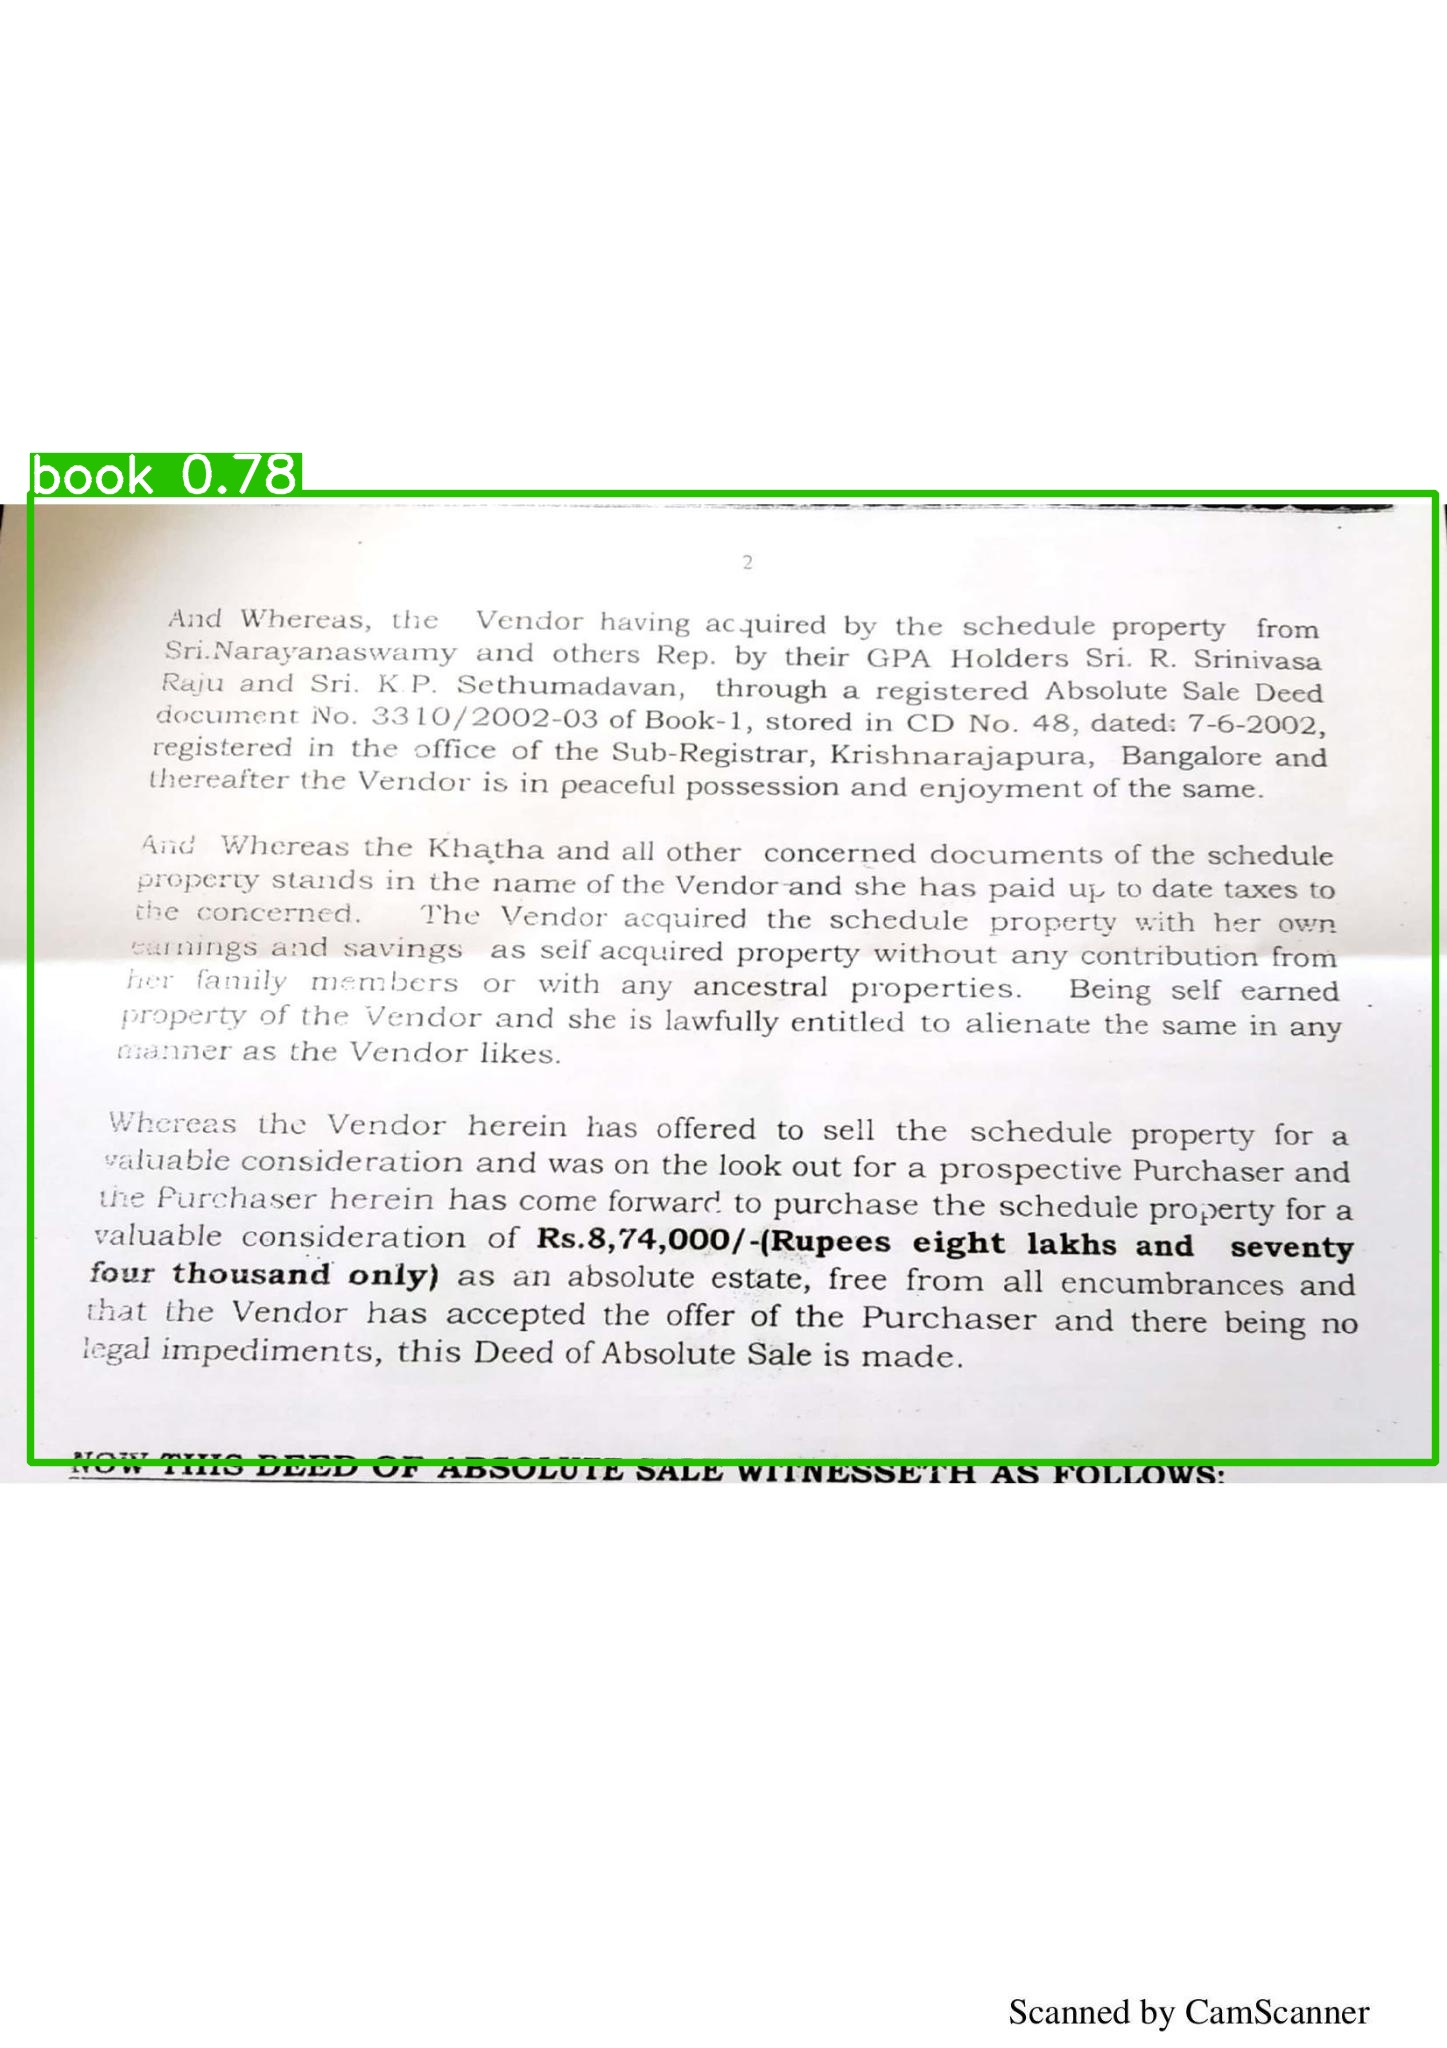

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg', width=600)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open('/content/Documents-Dataset-3/test/images/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg')
result = model.predict(image, conf=0.25)[0]


0: 640x480 1 book, 162.1ms
Speed: 6.2ms preprocess, 162.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
result.boxes.xyxy

tensor([[  30.1239,  493.4229, 1435.2502, 1462.8705]])

In [ ]:
result.boxes.conf

tensor([0.7817])

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

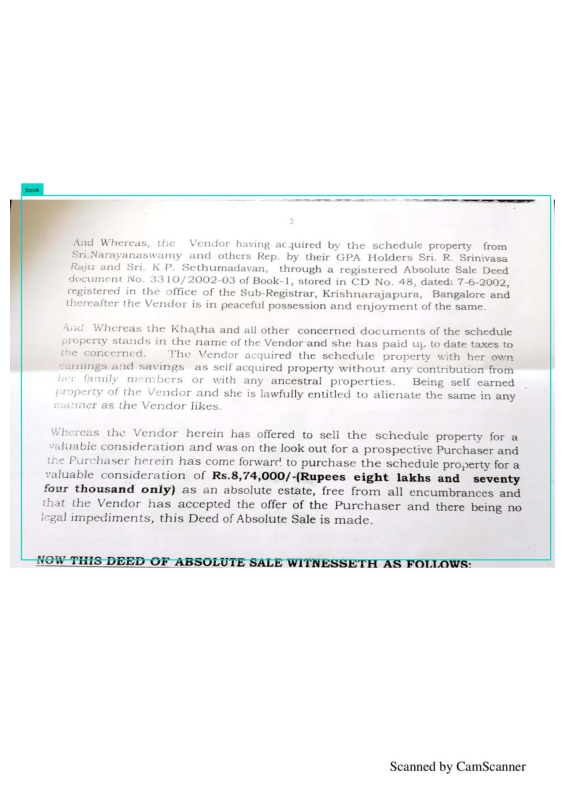

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [ ]:
image2 = Image.open('/content/Documents-Dataset-3/valid/images/019242_webp.rf.844696e12b1dad267791fc8aa2a353e9.jpg')
result2 = model.predict(image, conf=0.25)[0]


0: 640x480 1 book, 156.8ms
Speed: 4.6ms preprocess, 156.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


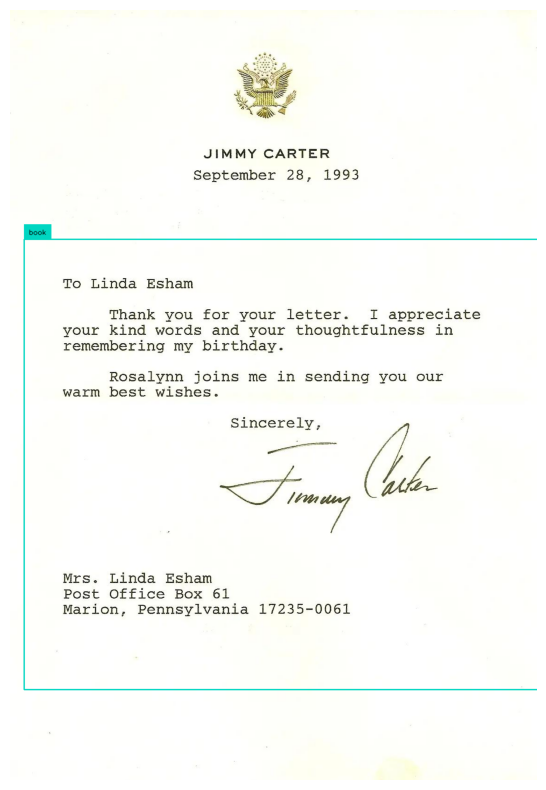

In [ ]:
annotated_image = image2.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 245MB/s]
New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Documents-Dataset-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

In [ ]:
!ls {HOME}/Documents-Dataset-3/train

images	labels


## Running Inference on the ROBOFLOW trained model

In [1]:
!pip install inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.7/950.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

Load  Model and Run Inference

In [3]:
# import a utility function for loading Roboflow models
from inference import get_model

# define the image url to use for inference
image = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*xFrTKax5tKxLdGMTU7qUMQ.png"

# load a pre-trained yolov8n model
model = get_model(model_id="documents-dataset-yygxz/3",api_key="ROBOFLOW_API_KEY")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)

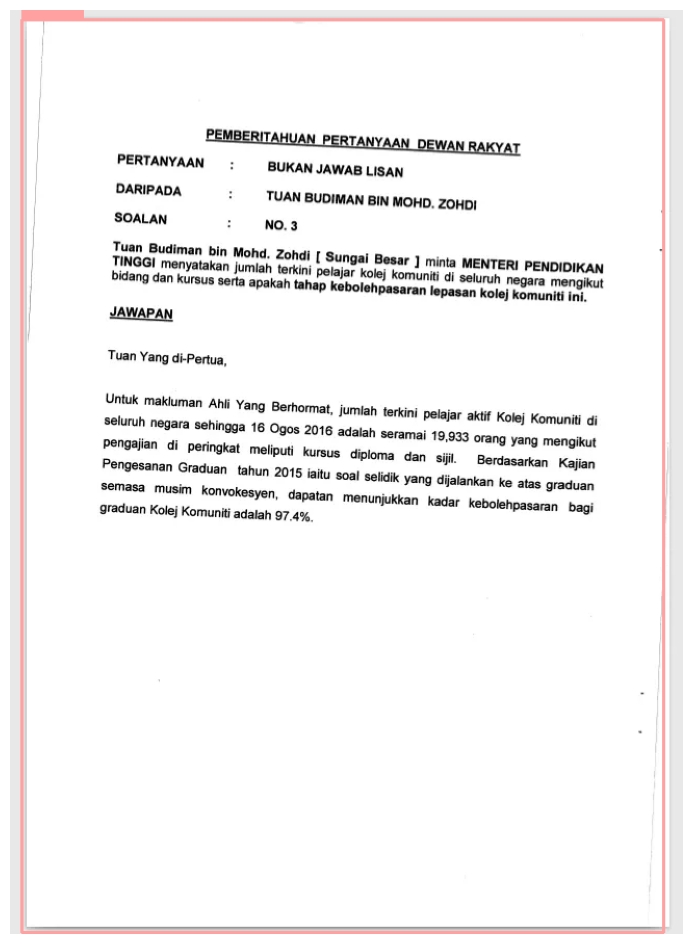

In [11]:
from io import BytesIO

import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile


def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image

# define the image url to use for inference
image_url = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*xFrTKax5tKxLdGMTU7qUMQ.png"

# load the image from the URL
image = load_image_from_url(image_url)

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results[0])

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

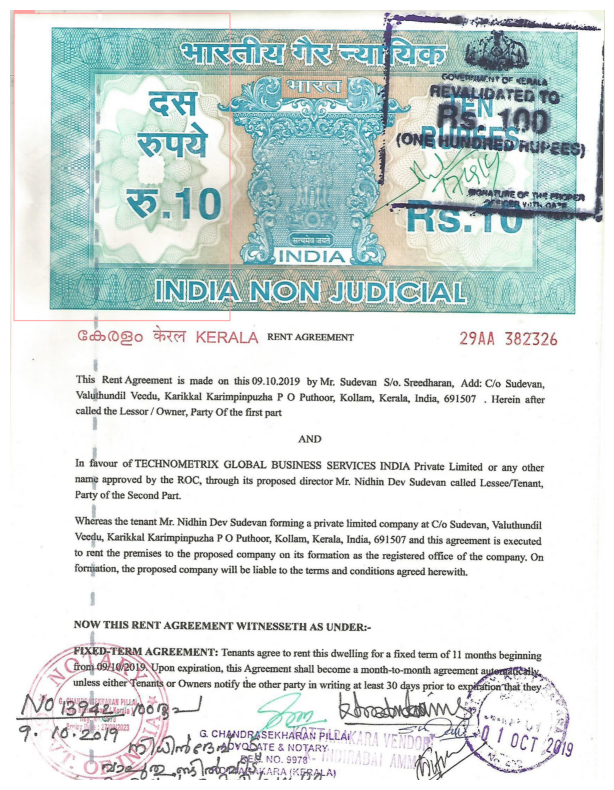

In [12]:
import supervision as sv

image= Image.open("/content/From_test34.jpg")

# Create annotators
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

# Annotate the image
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)  # Add this line

# Display the image
sv.plot_image(annotated_image, size=(10, 10))